In [2]:
import random as rd
import matplotlib
from pylab import *
import networkx as nx
import collections
import numpy as np

m0 = 30 # number of nodes in initial condition
m = 4 # number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        if rd.uniform(0,1) < 0.5:
            for i in range(m):
                j = pref_select(nds)
                g.add_edge(newcomer, j)
                nds.remove(j)
            g.pos[newcomer] = (0, 0)
        else:
            for i in range(m):
                j = rd.choice(nds)
                if g.degree[j] > 0:
                    g.add_edge(newcomer, j)
                    nds.remove(j)
            g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

def degree_dist():
    global g
    #the code for the degree distriibutiion was taken from the networkx documentation
    #https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
    
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(figsize=(11,6))
    plt.bar(deg, cnt, width=0.80, color="b")
    
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()
    
    print('The average degree is', round(np.mean(degree_sequence),2), 'and the 95% confidence interval is', np.percentile(degree_sequence, [2.5, 97.5]))
#matplotlib.use('TkAgg')
#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])
    

/Users/nazaryaremko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


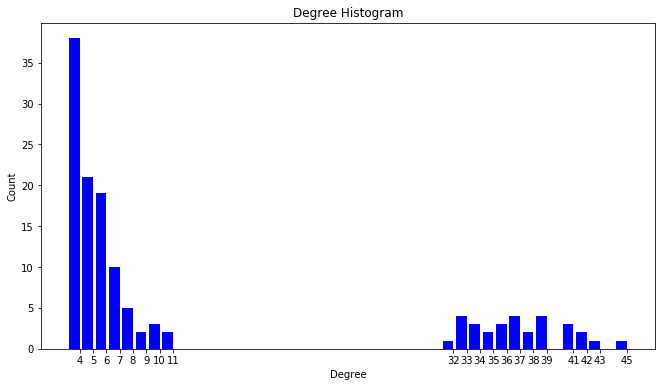

The average degree is 12.85 and the 95% confidence interval is [ 4.    41.775]


In [6]:
initialize()
for i in range(2000):
    update()
    
degree_dist()

In [4]:
def update2():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

    
#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])

/Users/nazaryaremko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


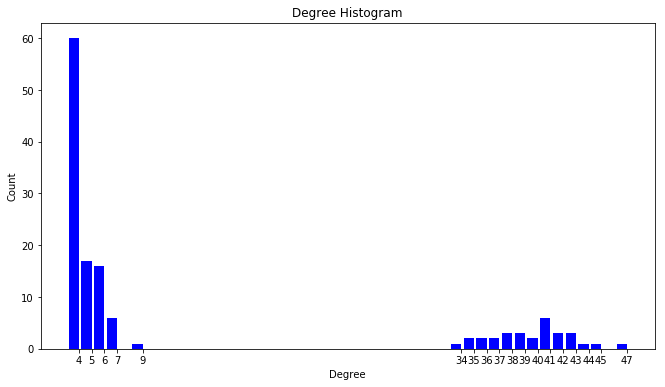

The average degree is 12.85 and the 95% confidence interval is [ 4. 43.]


In [7]:
initialize()
for i in range(2000):
    update2()
    
degree_dist()